# Titanic Machine Learning Practice Project
In this practice project, we use machine learning to predict if a given passenger will survive the Titanic crash. This is an ongoing competition on kaggle.com. I did this project to gain knowledge and experience in machine learning and data science. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

## Data Key
|Variable|Definition|Key|
|:-------|:---------|:--|
|Survival|Survival|0 = No, 1 = Yes|
|Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|Sex|Sex|
|Age|Age in years|
|Sibsp|# of siblings / spouses aboard the Titanic|
|Parch|# of parents / children aboard the Titanic|
|Ticket|Ticket number|
|Fare|Passenger fare|
|Cabin|Cabin number|
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

## Loading Data

In the code below I load the data and partition the data into variables. Our prediction clastrain_test_splitput into the y variable. Our predictor classes are put into X for training data and X_test for the testing data that we will eventually make our final predictions with. PassengerId, Ticket,
and Name are excluded from the training and testing data because these categories are not expected contribute helpful information for survival prediction. 

I then split the training data into train and validation sets. 

In [2]:
# Importing Data
train = pd.read_csv('../input/titanic/train.csv', index_col='PassengerId')
test = pd.read_csv('../input/titanic/test.csv', index_col='PassengerId')

# View aspects of each dataframe
print('Training Data:\n', train.shape)
print('\n\nTesting Data:\n', test.shape)

y = train.Survived

# Selecting all features, excluding PassengerId, Survived, and Name
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']
X = train[features]
X_test = test[features]

# Splitting training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

Training Data:
 (891, 11)


Testing Data:
 (418, 10)


In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Exploration


### Sex

With a p-value of 1.1973570627755645e-58 from the chi-squared test, we see that sex and survival are related.


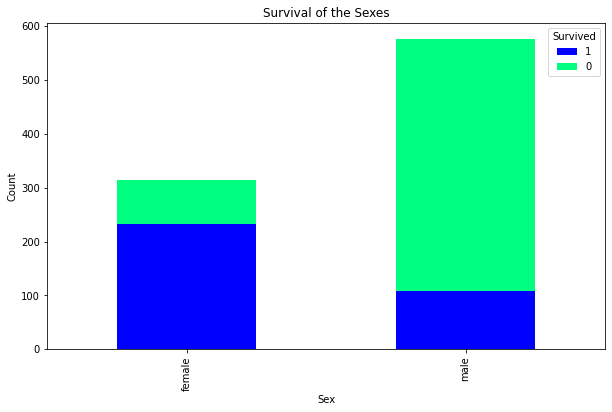

In [6]:
# Method to generate bar plot of those of each sex that survived along with chi-squared value
sex_survive = pd.crosstab(train['Sex'], train['Survived']).sort_index(axis=1, ascending=False)
sex_survive.plot.bar(stacked=True, 
                     title='Survival of the Sexes', 
                     ylabel='Count',
                     colormap='winter', 
                     figsize=(10,6))
chi2, p, dof, exp = stats.chi2_contingency(sex_survive)
print('With a p-value of '+str(p)+' from the chi-squared test, we see that sex and survival are related.')

### Ticket Class

With a p-value of 4.5492517112987287e-23 from the chi-squared test, we see that ticket class and survival are related.


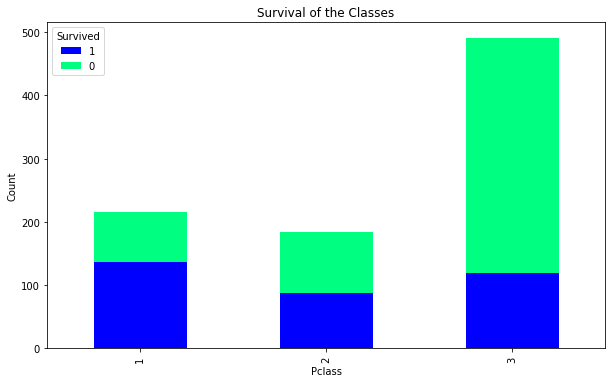

In [7]:
pclass_survive = pd.crosstab(train['Pclass'], train['Survived']).sort_index(axis=1, ascending=False)
pclass_survive.plot.bar(stacked=True, 
                        title='Survival of the Classes', 
                        ylabel='Count',
                        colormap='winter', 
                        figsize=(10,6))
chi2, p, dof, exp = stats.chi2_contingency(pclass_survive)
print('With a p-value of '+str(p)+' from the chi-squared test, we see that ticket class and survival are related.')

### Siblings and Spouses

With a p-value of 1.5585810465902116e-06 from the chi-squared test, we see that number of siblings/spouses and survival are related.


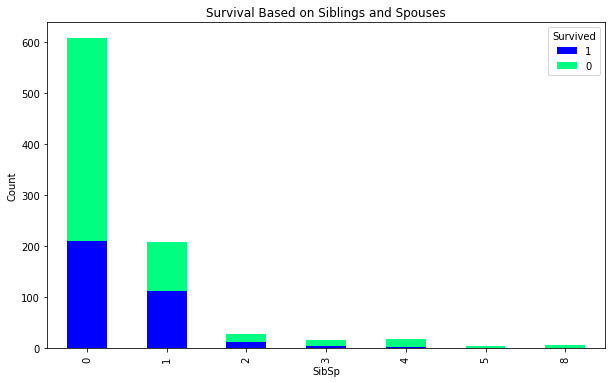

In [8]:
sib_survive = pd.crosstab(train['SibSp'], train['Survived']).sort_index(axis=1, ascending=False)
sib_survive.plot.bar(stacked=True, 
                     title='Survival Based on Siblings and Spouses', 
                     ylabel='Count',
                     colormap='winter', 
                     figsize=(10,6))
chi2, p, dof, exp = stats.chi2_contingency(sib_survive)
print('With a p-value of '+str(p)+' from the chi-squared test, we see that number of siblings/spouses and survival are related.')

### Parents and Children

With a p-value of 9.703526421039997e-05 from the chi-squared test, we see that number of parents/children and survival are related.


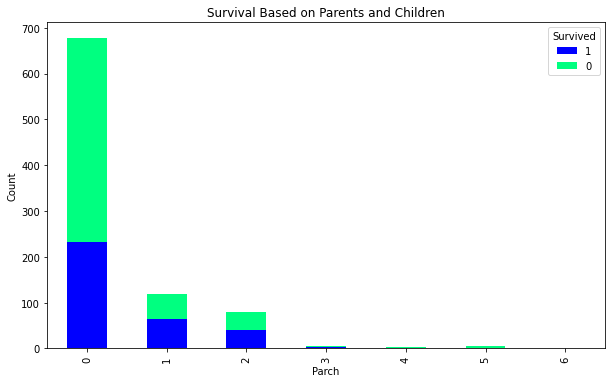

In [9]:
parch_survive = pd.crosstab(train['Parch'], train['Survived']).sort_index(axis=1, ascending=False)
parch_survive.plot.bar(stacked=True, 
                       title='Survival Based on Parents and Children', 
                       ylabel='Count',
                       colormap='winter', 
                       figsize=(10,6))
chi2, p, dof, exp = stats.chi2_contingency(parch_survive)
print('With a p-value of '+str(p)+' from the chi-squared test, we see that number of parents/children and survival are related.')

### Age

<AxesSubplot:title={'center':'Survival Based on Age'}, ylabel='Age'>

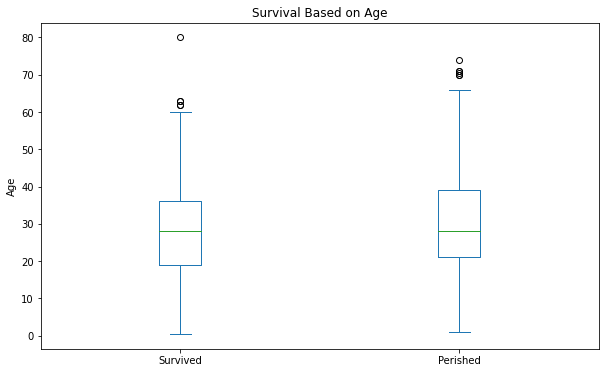

In [10]:
age_survive = pd.concat([train.Age[train.Survived==1],
                         train.Age[train.Survived==0]], 
                         axis=1)
age_survive.columns = ['Survived', 'Perished']
age_survive.plot.box(title='Survival Based on Age', 
                     ylabel='Age',
                     figsize=(10,6))

#### Is Age a normal distribution?
If the Age category is a normal distribution, then we can use ANOVA to determine if there is a significant difference between the means of the ages that survived versus those that did not. If it is not a normal distribution, we will use the Kruskal-Wallis test to determine if the medians are significantly different.

In [11]:
# Testing the Age column to see if it is a normal distribution
from scipy.stats import normaltest

stat, p = normaltest(train.Age,
                     nan_policy='omit')
if p<1e-3:
    print('Age is not normally distributed.\np = '+str(p))
else:
    print('Age is normally distributed.\np = '+str(p))

Age is not normally distributed.
p = 0.00011709599657350744


Because Age is not normally distributed, we are using the Kruskal-Wallis H-test rather than ANOVA. 

In [12]:
from scipy.stats import kruskal

H, p = kruskal(age_survive['Survived'],
               age_survive['Perished'], 
               nan_policy='omit')
if p<1e-3:
    print('The median of the survived and perished age groups are not equal.\np = '+str(p))
else:
    print('The median of the survived and perished age groups are equal.\np = '+str(p))

The median of the survived and perished age groups are equal.
p = 0.16043746252207006


Because the medians are equal, Age will not be very helpful in determining if a passenger survives. 

<AxesSubplot:title={'center':'Survival by Age'}, xlabel='Age', ylabel='Count'>

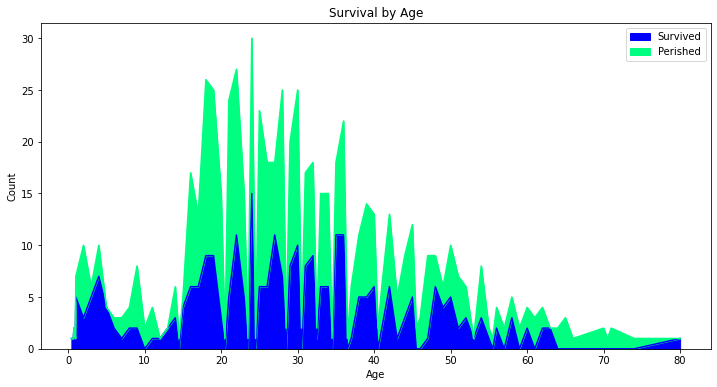

In [13]:
age_survive_group = train.groupby('Survived').Age.value_counts().sort_index()
age_survive_count = pd.concat([age_survive_group[1],
                               age_survive_group[0]], 
                               axis=1)
age_survive_count.columns = ['Survived','Perished']
age_survive_count.plot.area(title='Survival by Age',
                            ylabel='Count',
                            colormap='winter',
                            figsize=(12,6))

#### Binning the Age groups
In this section, I bin the age groups with different bin sizes to determine if changing the variable from numerical to categorical will improve its value in predicting survival. Because the variable is now categorical, we will evaluate it with a chi-squared test.

With a p-value of 0.007930788925480686 from the chi-squared test, we see that age bins and survival are somewhat related.


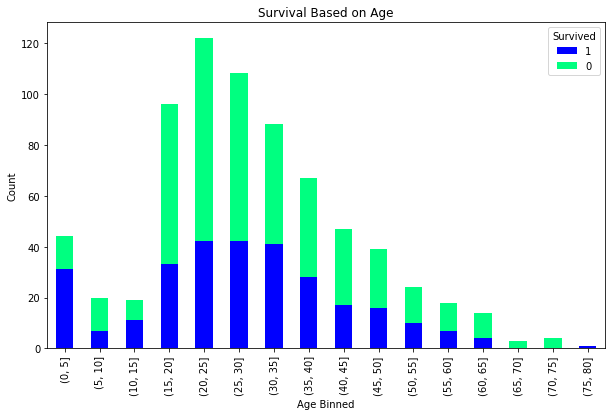

In [14]:
age_bin = pd.cut(train.Age,range(0,81,5))
age_bin.name = 'Age Binned'
age_bin_survive = pd.crosstab(age_bin, train['Survived']).sort_index(axis=1, ascending=False)
age_bin_survive.plot.bar(stacked=True, 
                         title='Survival Based on Age', 
                         ylabel='Count',
                         colormap='winter', 
                         figsize=(10,6))
chi2, p, dof, exp = stats.chi2_contingency(age_bin_survive)
print('With a p-value of '+str(p)+' from the chi-squared test, we see that age bins and survival are somewhat related.')

With a p-value of 0.03237887956708356 from the chi-squared test, we see that age bins and survival are somewhat related.


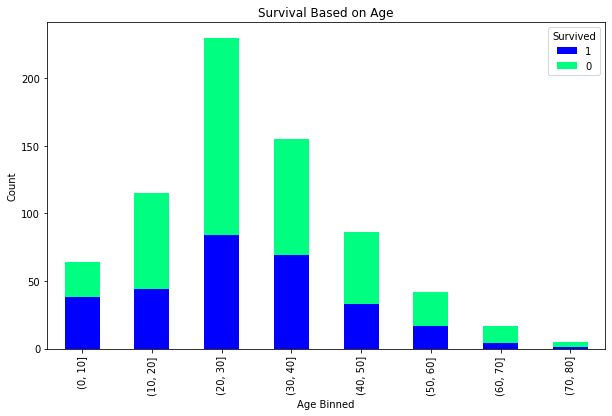

In [15]:
age_bin = pd.cut(train.Age,range(0,81,10))
age_bin.name = 'Age Binned'
age_bin_survive = pd.crosstab(age_bin, train['Survived']).sort_index(axis=1, ascending=False)
age_bin_survive.plot.bar(stacked=True, 
                         title='Survival Based on Age', 
                         ylabel='Count',
                         colormap='winter', 
                         figsize=(10,6))
chi2, p, dof, exp = stats.chi2_contingency(age_bin_survive)
print('With a p-value of '+str(p)+' from the chi-squared test, we see that age bins and survival are somewhat related.')

In [16]:
# Analyzing p-values with a chi-square test for different age bin sizes
for i in [1,2,3,4,5,10,15,20,30,40]:
    age_bin = pd.cut(train.Age,range(0,81,i))
    age_bin.name = 'Age Binned'
    age_bin_survive = pd.crosstab(age_bin, train['Survived']).sort_index(axis=1, ascending=False)
    chi2, p, dof, exp = stats.chi2_contingency(age_bin_survive)
    print('Bins size: '+str(i)+'\tp-value: '+str(p))

Bins size: 1	p-value: 0.027324993647482955
Bins size: 2	p-value: 0.1430296644577068
Bins size: 3	p-value: 0.008550428212754615
Bins size: 4	p-value: 0.028533621872558593
Bins size: 5	p-value: 0.007930788925480686
Bins size: 10	p-value: 0.03237887956708356
Bins size: 15	p-value: 0.0007587571581613228
Bins size: 20	p-value: 0.15965998877520762
Bins size: 30	p-value: 0.7597522877775755
Bins size: 40	p-value: 0.31025795198781375


Based on this analysis, bins of size 15 will be the most useful in determining survival.

### Fare

<AxesSubplot:title={'center':'Survival Based on Fare'}, ylabel='Fare'>

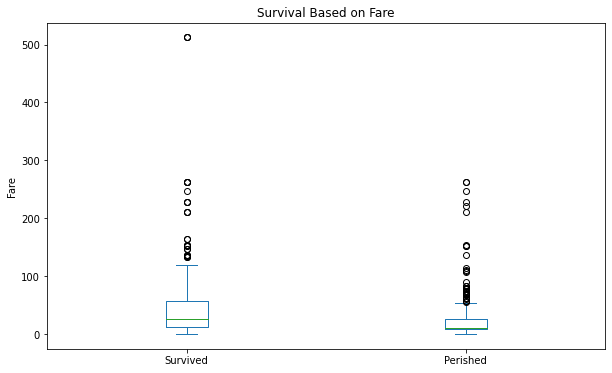

In [17]:
fare_survive = pd.concat([train.Fare[train.Survived==1],
                          train.Fare[train.Survived==0]], 
                          axis=1)
fare_survive.columns = ['Survived', 'Perished']
fare_survive.plot.box(title='Survival Based on Fare', 
                      ylabel='Fare',
                      figsize=(10,6))

In [18]:
# Testing the Fare column to see if it is a normal distribution
stat, p = normaltest(train.Fare,
                     nan_policy='omit')
if p<1e-3:
    print('Fare is not normally distributed.\np = '+str(p))
else:
    print('Fare is normally distributed.\np = '+str(p))

Fare is not normally distributed.
p = 3.727091062842147e-197


In [19]:
H, p = kruskal(fare_survive['Survived'],
               fare_survive['Perished'], 
               nan_policy='omit')
if p<1e-3:
    print('The median of the survived and perished age groups are not equal.\np = '+str(p))
else:
    print('The median of the survived and perished age groups are equal.\np = '+str(p))

The median of the survived and perished age groups are not equal.
p = 4.547532067492866e-22


Because the medians are significantly different, Fare can be used to help determine whether a passenger survived.

<AxesSubplot:title={'center':'Survival by Fare'}, xlabel='Fare', ylabel='Count'>

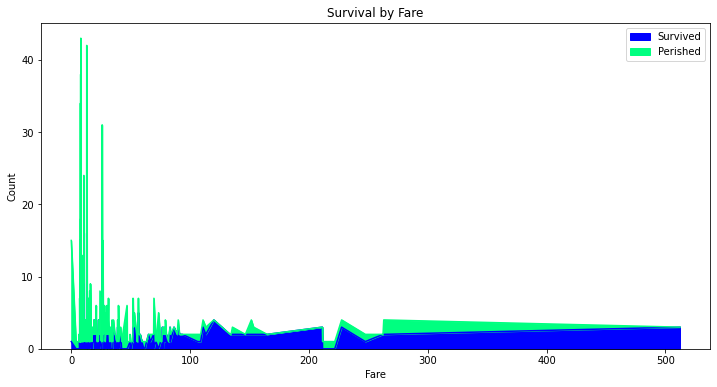

In [20]:
fare_survive_group = train.groupby('Survived').Fare.value_counts().sort_index()
fare_survive_count = pd.concat([fare_survive_group[1],
                                fare_survive_group[0]], 
                                axis=1)
fare_survive_count.columns = ['Survived','Perished']
fare_survive_count.plot.area(title='Survival by Fare', 
                             ylabel='Count',
                             colormap='winter', 
                             figsize=(12,6))

### Ticket

In [21]:
train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

The Ticket category has a high number of unique values and does not seem to follow a standard convention. Many values are only numbers, some have both letters and numbers, and a few have only letters. Because of this and the fact that, logically, ticket number is not likely to be related to survival, this category will be excluded.

### Cabin

In [22]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

With a p-value of 0.2164406943045198 from the chi-squared test, we see that cabin letter and survival are not related.


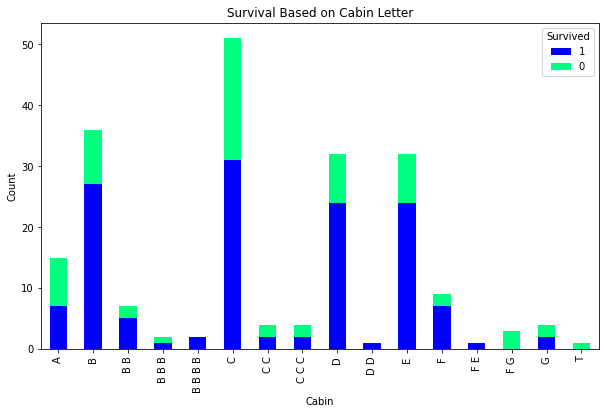

In [23]:
cabin_letter = train.Cabin.str.replace('[0-9]','',regex=True)
cabin_letter_survive = pd.crosstab(cabin_letter, train['Survived']).sort_index(axis=1, ascending=False)
cabin_letter_survive.plot.bar(stacked=True, 
                              title='Survival Based on Cabin Letter', 
                              ylabel='Count',
                              colormap='winter', 
                              figsize=(10,6))
chi2, p, dof, exp = stats.chi2_contingency(cabin_letter_survive)
print('With a p-value of '+str(p)+' from the chi-squared test, we see that cabin letter and survival are not related.')

With a p-value of 0.09997787488172845 from the chi-squared test, we see that cabin number and survival are not related.


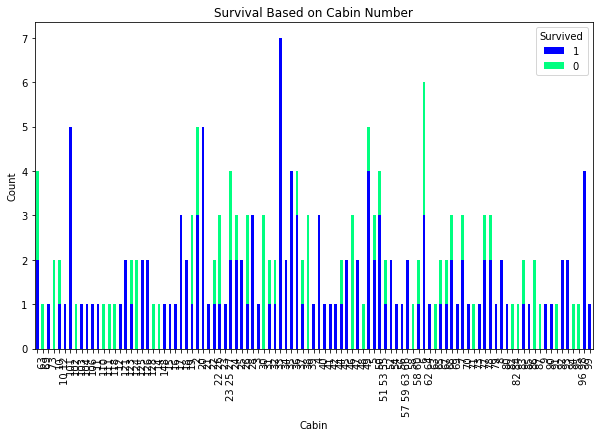

In [24]:
cabin_num = train.Cabin.str.replace('[A-Z]','',regex=True)
cabin_num_survive = pd.crosstab(cabin_num, train['Survived']).sort_index(axis=1, ascending=False)
cabin_num_survive.plot.bar(stacked=True, 
                           title='Survival Based on Cabin Number', 
                           ylabel='Count',
                           colormap='winter', 
                           figsize=(10,6))
chi2, p, dof, exp = stats.chi2_contingency(cabin_num_survive)
print('With a p-value of '+str(p)+' from the chi-squared test, we see that cabin number and survival are not related.')

### Embarked

In [25]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

With a p-value of 1.769922284120912e-06 from the chi-squared test, we see that embark point and survival are related.


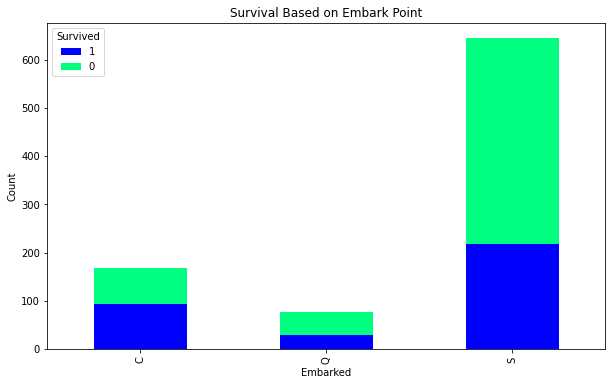

In [26]:
embarked_survive = pd.crosstab(train['Embarked'], train['Survived']).sort_index(axis=1, ascending=False)
embarked_survive.plot.bar(stacked=True, 
                          title='Survival Based on Embark Point', 
                          ylabel='Count',
                          colormap='winter', 
                          figsize=(10,6))
chi2, p, dof, exp = stats.chi2_contingency(embarked_survive)
print('With a p-value of '+str(p)+' from the chi-squared test, we see that embark point and survival are related.')

# <mark> TODO <mark>
    
   Create table identifying viable categories

### Missing Values

In [27]:
# Checking for columns with missing values
print('Training Data')
print(X_train.shape)
miss_val_col = X_train.isnull().sum()
print(miss_val_col[miss_val_col>0])

print('\nValidation Data')
print(X_val.shape)
miss_val_col = X_val.isnull().sum()
print(miss_val_col[miss_val_col>0])

print('\nTesting Data')
print(X_test.shape)
miss_val_col = X_test.isnull().sum()
print(miss_val_col[miss_val_col>0])

Training Data
(668, 8)
Age         132
Cabin       519
Embarked      2
dtype: int64

Validation Data
(223, 8)
Age       45
Cabin    168
dtype: int64

Testing Data
(418, 8)
Age       86
Fare       1
Cabin    327
dtype: int64


In [28]:
X = X.drop('Cabin', axis=1)
X_train = X_train.drop('Cabin', axis=1)
X_val = X_val.drop('Cabin', axis=1)
X_test = X_test.drop('Cabin', axis=1)

In [29]:
# Identifying categorical and numerical columns
print(X_train.dtypes)
cat_cols = X_train.columns[X_train.dtypes == 'object']
print('\nUnique values of categorical columns:\n',X_train[cat_cols].nunique())

num_cols = X_train.columns.drop(cat_cols)
print('\nNumerical columns:\n',num_cols)

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Unique values of categorical columns:
 Sex         2
Embarked    3
dtype: int64

Numerical columns:
 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


## Preprocessing

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Numerical data preprocessing
num_preproc = SimpleImputer(strategy='mean')

# Categorical data preprocesseing
cat_preproc = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OrdinalEncoder(handle_unknown='error'))
])

# Combining numerical and categorical preprocessors
preproc = ColumnTransformer(transformers=[
    ('num',num_preproc,num_cols),
    ('cat',cat_preproc,cat_cols)
])

#### Selecting Best Features

In [31]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2

X_proc = pd.DataFrame(preproc.fit_transform(X))
X_proc.columns = X.columns
X_proc.head()

feat_selector = GenericUnivariateSelect(chi2, mode='fpr')

X_best = feat_selector.fit_transform(X_proc, y)

In [32]:
best_feats = feat_selector.get_feature_names_out()
best_feats

array(['Pclass', 'Sex', 'Parch', 'Fare'], dtype=object)

## Building model and pipeline

In [33]:
from sklearn.ensemble import RandomForestClassifier

first_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [34]:
first_pipeline = Pipeline(steps=[
    ('preprocessor',preproc),
    ('model',first_model)
])

first_pipeline.fit(X_train,y_train)
y_pred = first_pipeline.predict(X_val)

In [35]:
# Computing accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

0.7982062780269058

## Analyzing for parameter improvements

In [36]:
# Method to build pipeline and compute accuracy based on preprocessing and model parameters
def pipe_acc(num_preprocessor,cat_preprocessor,model):
    
    preproc = ColumnTransformer(transformers=[
        ('num',num_preprocessor,num_cols),
        ('cat',cat_preprocessor,cat_cols)
    ])
    my_pipeline = Pipeline(steps=[
        ('preprocessor',preproc),
        ('model',model)
    ])
    
    my_pipeline.fit(X_train,y_train)
    return accuracy_score(y_val,my_pipeline.predict(X_val))

### Numerical Preprocessors

In [37]:
# Analyzing numerical category preprocessors

# Simple imputer parameters
print('Simple Imputer')
strategy = ['mean','median','most_frequent','constant']
for s in strategy:
    print(s+': %.3f' % (pipe_acc(SimpleImputer(strategy=s), cat_preproc, first_model)))

Simple Imputer
mean: 0.798
median: 0.785
most_frequent: 0.789
constant: 0.789


In [38]:
from sklearn.impute import KNNImputer

#KNN Imputer parameters
print('KNN Imputer')
n_neighbors = [1, 5, 10, 15, 20, 25, 30, 35, 40]
weights = ['uniform', 'distance']
for n in n_neighbors:
    for w in weights:
        print(w+' '+str(n)+' NN: %.3f' % (pipe_acc(KNNImputer(n_neighbors=n,weights=w),cat_preproc,first_model)))

KNN Imputer
uniform 1 NN: 0.776
distance 1 NN: 0.776
uniform 5 NN: 0.789
distance 5 NN: 0.780
uniform 10 NN: 0.803
distance 10 NN: 0.785
uniform 15 NN: 0.816
distance 15 NN: 0.789
uniform 20 NN: 0.789
distance 20 NN: 0.794
uniform 25 NN: 0.789
distance 25 NN: 0.780
uniform 30 NN: 0.789
distance 30 NN: 0.789
uniform 35 NN: 0.776
distance 35 NN: 0.798
uniform 40 NN: 0.789
distance 40 NN: 0.798


#### Final numerical preprocessor

In [39]:
fin_num_preproc = KNNImputer(n_neighbors = 20, weights='uniform')

### Categorical Preprocessors

In [40]:
from sklearn.preprocessing import OrdinalEncoder

# Simple imputer
print('Simple Imputer Tests')
cat_preproc_tester = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])
print('most frequent: %0.3f' % (pipe_acc(fin_num_preproc,cat_preproc_tester,first_model)))

cat_preproc_tester = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])
print('constant: %0.3f' % (pipe_acc(fin_num_preproc,cat_preproc_tester,first_model)))

# Encoder
print('\nEncoder Tests')
cat_preproc_tester = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])
print('one hot: %0.3f' % (pipe_acc(fin_num_preproc,cat_preproc_tester,first_model)))

cat_preproc_tester = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinal',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))
])
print('ordinal: %0.3f' % (pipe_acc(fin_num_preproc,cat_preproc_tester,first_model)))

Simple Imputer Tests
most frequent: 0.803
constant: 0.798

Encoder Tests
one hot: 0.803
ordinal: 0.789


#### Final categorical preprocessor

In [41]:
fin_cat_preproc = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])


### Models

In [42]:
# Random Forest
print("Random Forest\nNumber of Trees")
n_estimators = [10,50,100,150,200,250,300,350,400]
for n in n_estimators:
    print(str(n)+' trees: %0.3f' % (pipe_acc(fin_num_preproc,fin_cat_preproc,
                                            RandomForestClassifier(n_estimators=n,random_state=42))))

print("\nCriterion")
print('gini: %0.3f' % (pipe_acc(fin_num_preproc,fin_cat_preproc,
                                            RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42))))
print('entropy: %0.3f' % (pipe_acc(fin_num_preproc,fin_cat_preproc,
                                            RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42))))

print("\nMax Depth")
max_depth = [None,2,4,6,8,10,12,14,16,18,20]
for m in max_depth:
    print(str(m)+' max depth: %0.3f' % (pipe_acc(fin_num_preproc,fin_cat_preproc,
                                            RandomForestClassifier(n_estimators=100,max_depth=m,random_state=42))))

print("\nMin Samples Split")
min_samples_split = [0.01,0.1,0.5,2,4,6,8,10,12,14,16,18,20]
for m in min_samples_split:
    print(str(m)+' min samples split: %0.3f' % (pipe_acc(fin_num_preproc,fin_cat_preproc,
                                                         RandomForestClassifier(n_estimators=100,min_samples_split=m,max_depth=8,random_state=42))))

print("\nMin Samples Leaf")
min_samples_leaf = [1,2,4,6,8,10,12,14,16,18,20]
for m in min_samples_leaf:
    print(str(m)+' min samples leaf: %0.3f' % (pipe_acc(fin_num_preproc,fin_cat_preproc,
                                                         RandomForestClassifier(n_estimators=100,min_samples_leaf=m,max_depth=8,random_state=42))))

Random Forest
Number of Trees
10 trees: 0.762
50 trees: 0.785
100 trees: 0.803
150 trees: 0.794
200 trees: 0.785
250 trees: 0.794
300 trees: 0.798
350 trees: 0.794
400 trees: 0.789

Criterion
gini: 0.803
entropy: 0.794

Max Depth
None max depth: 0.803
2 max depth: 0.785
4 max depth: 0.812
6 max depth: 0.816
8 max depth: 0.821
10 max depth: 0.816
12 max depth: 0.798
14 max depth: 0.798
16 max depth: 0.798
18 max depth: 0.789
20 max depth: 0.803

Min Samples Split
0.01 min samples split: 0.816
0.1 min samples split: 0.812
0.5 min samples split: 0.785
2 min samples split: 0.821
4 min samples split: 0.816
6 min samples split: 0.816
8 min samples split: 0.812
10 min samples split: 0.821
12 min samples split: 0.816
14 min samples split: 0.812
16 min samples split: 0.816
18 min samples split: 0.821
20 min samples split: 0.812

Min Samples Leaf
1 min samples leaf: 0.821
2 min samples leaf: 0.807
4 min samples leaf: 0.825
6 min samples leaf: 0.812
8 min samples leaf: 0.821
10 min samples leaf: 

In [43]:
fin_forest_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

fin_preproc = ColumnTransformer(transformers=[
    ('num',fin_num_preproc,num_cols),
    ('cat',fin_cat_preproc,cat_cols)
])

fin_forest_pipeline = Pipeline(steps=[
    ('preprocessor',fin_preproc),
    ('model',fin_forest_model)
])

## Cross-Validation

In [44]:
# Evaluating model with cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(fin_forest_pipeline, X, y,
                         cv=5,
                         scoring='accuracy')

print("Average accuracy:\n", scores.mean())

Average accuracy:
 0.831680371602536


## XGBoost

In [45]:
X_train_proc = pd.DataFrame(fin_preproc.fit_transform(X_train))
X_val_proc = pd.DataFrame(fin_preproc.fit_transform(X_val))

In [46]:
from xgboost import XGBClassifier

def xgb_acc(xgb_model):
    xgb_model.fit(X_train_proc, y_train)

    y_xgbpred = xgb_model.predict(X_val_proc)
    
    return accuracy_score(y_val,y_xgbpred)

In [47]:
# XGBost Parameter Analyzation
print('Default Parameters Accuracy')
print('Default: %0.3f' %(xgb_acc(XGBClassifier(verbosity=0,
                                               use_label_encoder=False))))    

print('\nNumber of Estimators')
for n in range(5,45,5):
    print('%0.1f trees: %0.3f' % (n,xgb_acc(XGBClassifier(n_estimators=n,
                                                               verbosity=0,
                                                               use_label_encoder=False))))
#n_estimators = 20


print('\nMax Depth')
for n in range(2,21,2):
    print('%0.1f max depth: %0.3f' % (n,xgb_acc(XGBClassifier(max_depth=n,
                                                              n_estimators=5,
                                                              verbosity=0,
                                                              use_label_encoder=False))))
#max_depth = 6

print('\nLearning Rate')
for l in np.arange(0.1,1,0.1):
    print('%0.1f max depth: %0.3f' % (l,xgb_acc(XGBClassifier(learning_rate=l,
                                                              n_estimators=5,
                                                              verbosity=0,
                                                              use_label_encoder=False))))


Default Parameters Accuracy
Default: 0.767

Number of Estimators
5.0 trees: 0.825
10.0 trees: 0.812
15.0 trees: 0.821
20.0 trees: 0.798
25.0 trees: 0.785
30.0 trees: 0.780
35.0 trees: 0.771
40.0 trees: 0.771

Max Depth
2.0 max depth: 0.776
4.0 max depth: 0.821
6.0 max depth: 0.825
8.0 max depth: 0.812
10.0 max depth: 0.807
12.0 max depth: 0.798
14.0 max depth: 0.798
16.0 max depth: 0.798
18.0 max depth: 0.798
20.0 max depth: 0.798

Learning Rate
0.1 max depth: 0.830
0.2 max depth: 0.830
0.3 max depth: 0.825
0.4 max depth: 0.816
0.5 max depth: 0.803
0.6 max depth: 0.807
0.7 max depth: 0.830
0.8 max depth: 0.803
0.9 max depth: 0.821


## BREAK

## Final Model

In [48]:

fin_model = fin_forest_model

fin_preproc = ColumnTransformer(transformers=[
    ('num',fin_num_preproc,num_cols),
    ('cat',fin_cat_preproc,cat_cols)
])

fin_pipeline = Pipeline(steps=[
    ('preprocessor',fin_preproc),
    ('model',fin_model)
])

fin_pipeline.fit(X_train,y_train)
pred_test = fin_pipeline.predict(X_test)

## Saving output for submission

In [49]:
output = pd.DataFrame({'PassengerId': test.index,
                       'Survived': pred_test})
output.to_csv('submission.csv', index=False)

In [50]:
s = pd.read_csv('./submission.csv')
s.shape

(418, 2)